# **APA - Linear Regression**
# DATA 3300





## Name(s): Chance Wiese

**When conducting a linear regression analysis, it’s critical to conduct exploratory analytics to identify if the assumptions of linear regression (relationship is linear, independent error values, error values are normally distributed, and residuals are homoscedastic) are met, or if data need to be modified to meet these assumptions. *For the linear regression exercise and this APA, assume this has already been done.***

# Q1

**Begin by importing the required packages (provided below), and then importing the cinema.xlsx dataset. View the heading of your dataframe.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metric

In [3]:
# replace with code to read in and preview cinema.xlsx file
df = pd.read_excel("cinema-s24.xlsx")
df.head()

,rating,rottentom,metacrit,wks,sportevent,budget,genre,attend
0,pg,0.61,58,14,n,195,action,322
1,pg,0.72,63,14,y,120,drama,265
2,r,0.51,47,10,y,128,drama,231
3,pg13,0.93,71,11,n,134,action,401
4,pg13,0.32,36,8,n,32,comedy,285


## A
**Assume all variables are normally distributed. Run a Pearson CORRELATION analysis on your variables to examine relationships amongst all non-categorical variables. Remember to drop all variables from the correlation analysis that cannot be included.**

**Present your correlation matrix in a color-mapped table.**



In [6]:
# replace with code to create new dataframe that drops variables that can't be included in correlation
df_cor = df.drop(["rating","sportevent","genre"], axis=1)
# replace with code to run correlation matrix
cor_matrix2 = df_cor.corr()
# replace with code to display matrix in color-mapped table
cor_matrix2.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,rottentom,metacrit,wks,budget,attend
rottentom,1.000000,0.917039,0.164026,0.074880,0.721148
metacrit,0.917039,1.000000,0.118245,0.050960,0.699187
wks,0.164026,0.118245,1.000000,0.465320,-0.031286
budget,0.074880,0.050960,0.465320,1.000000,-0.011895
attend,0.721148,0.699187,-0.031286,-0.011895,1.000000


## B

**What percentage of the variance in `attend` is determined by the variance in `metacrit`? (Show your formula.) Interpret what the $r$ and $R^2$ values mean.**



In [7]:
# replace with code to calculate and show R^2 value
0.699187**2

0.488862460969

* r = 0.699187
* R^2 = 0.488862

* r is the correlation between attend and metacrit, meaning they have a strong positive correlation
* R^2 = 49%, meaning 49% of variance in attend is determined by the variance in metacrit

## C

**Using an $r$-value of 0.8 or greater to determine collinearity, identify one pair of IVs that appears collinear.**

**Identify the pair, provide the corresponding coefficient, and briefly discuss whether it makes sense for that pair to be collinear.**


* metacrit - rottentom, r = 0.917039
This makes sense because the higher something rates on rottentomatoes, the higher it will probably rate on metacritic

# Q2

**Run a linear regression analysis to create an estimation model to predict the weekly attendance of a movie. Remember to:**

* **Preprocess any variables as necessary (hint: categorical)**
* **Remove `metacrit` from your analysis (due to collinearity)**
* **Set the DV as y (we're interested in predicting movie attendance)**
* **Create a training and test set for your IVs (x) and your DV (y) as was shown in the ICE and in the Cheat Sheet**




In [8]:
df.columns

Index(['rating', 'rottentom', 'metacrit', 'wks', 'sportevent', 'budget',
       'genre', 'attend'],
      dtype='object')

In [16]:
# replace with code to select IVs to include in analysis, assign to object called 'x'
x = df.drop(['metacrit','attend'], axis=1)
# replace with code to dummy code categorical variables
x = pd.get_dummies(data = x, drop_first = True)
# replace with code to view x
x.head()

,rottentom,wks,budget,rating_pg13,rating_r,sportevent_y,genre_comedy,genre_drama
0,0.61,14,195,0,0,0,0,0
1,0.72,14,120,0,0,1,0,1
2,0.51,10,128,0,1,1,0,1
3,0.93,11,134,1,0,0,0,0
4,0.32,8,32,1,0,0,1,0


In [17]:
# replace with code to set attendance as your DV, in an object called 'y'
y = df['attend']

In [18]:
# replace with code to create 4 dataframe objects x_train, x_test, y_train, y_test. Set test_size to 0.2, set random_state to 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [21]:
# replace with code to add constant to x_train, assign to object called x_train_Sm
x_train_Sm = sm.add_constant(x_train)
# replace with code to fit model to x_train_Sm and y_train, assign to object called ls
ls = sm.OLS(y_train, x_train_Sm).fit()
# replace with code to print summary of ls
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     26.93
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.54e-23
Time:                        21:14:07   Log-Likelihood:                -680.99
No. Observations:                 127   AIC:                             1380.
Df Residuals:                     118   BIC:                             1406.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          169.0673     32.731      5.165   

## A

**Using a value of α = 0.1, identify the IVs with an *insignificant* relationship with the DV. For each, provide the IV and the corresponding p-value. *Note that if any part of a multi-part variable is significant, then the entire variable (including those that appear insignificant) is considered to have a significant relationship.***

**How do you know each IV’s impact on the DV is insignificant?**


budget, rating_pg13, rating_r, and genre_comedy are all insignificant because they have p-values greater than the threashhold of 0.1

## B

**Remove the variable with the highest p-value (note that if a multi-part variable is to be removed, all parts should be removed simultaneously), re-run the analysis, and include the summary table. Repeat this step until all IVs are significant at α = 0.1.**


In [22]:
# replace with code to drop variable(s) with highest p-value
x_train_Sm = x_train_Sm.drop(['budget'], axis=1)
# replace with code to retrain the model
ls = sm.OLS(y_train, x_train_Sm).fit()
# replace with code to display summary statistics of model
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     30.89
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           5.20e-24
Time:                        21:14:18   Log-Likelihood:                -681.18
No. Observations:                 127   AIC:                             1378.
Df Residuals:                     119   BIC:                             1401.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          165.8741     32.195      5.152   

In [23]:
# replace with code to drop remaining IV with p-value above 0.1
x_train_Sm = x_train_Sm.drop(['rating_pg13','rating_r'], axis=1)
# replace with code to retrain the model
ls = sm.OLS(y_train, x_train_Sm).fit()
# replace with code to display summary statistics of model
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     43.56
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.69e-25
Time:                        21:15:08   Log-Likelihood:                -681.56
No. Observations:                 127   AIC:                             1375.
Df Residuals:                     121   BIC:                             1392.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          169.2623     25.443      6.653   

# Q3

**Intepret the final data table. Specifically:**

## A
**How would you interpret the coefficient of `genre_drama`, knowing that `genre_action` is the reference group?**

**Is there a statistically significant difference in attendance between `genre_drama` and `genre_action`? How about between `genre_comedy` and `genre action`?**



* On average, about 22 less people attend drama movies, compared to action movies
* There is a significant difference in attendance between drama and action as their p value is below 0.1.
* there is not a significant difference between action and comedy, as the p value is above 0.1.

## B
**Develop a data visualization that includes the data points with the line of best fit (linear regression model) that illustrates the relationship between `attend` and `rottentom`.**



Text(0, 0.5, 'Attendance')

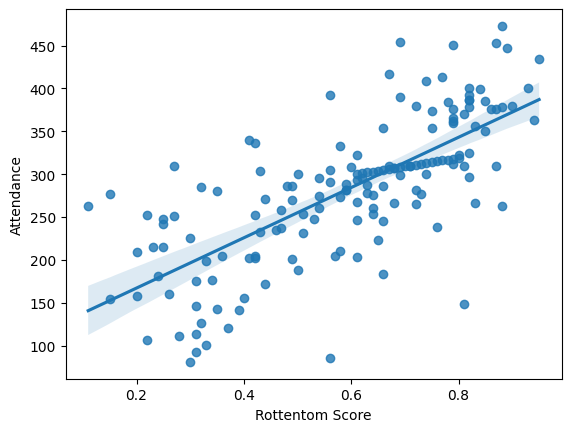

In [26]:
# replace with code to import seaborn as sns
import seaborn as sns
# replace with code to produce regression plot, pull x and y from df (e.g., y=df['attend'])
sns.regplot(x = df['rottentom'], y = df['attend'])
# replace with code to label x-axis
plt.xlabel("Rottentom Score")
# replace with code to label y-axis
plt.ylabel("Attendance")

## C

**Evaluate the performance of your final model by fitting it to the test set, this will give us an idea of how well our model would generalize to new data.**

**Print out both the mean squared error and the R-Squared of the model, fit to the test set data.**

**How does the $R^2$ of test set compare to that of training set? Is it higher or lower, what could this indicate?**


In [27]:
# replace with code to set LinearRegression function as object called 'model'
model = LinearRegression()
# replace with code to fit your finalized training set to the model
model.fit(x_train_Sm, y_train)

LinearRegression()

In [29]:
# replace with code to drop non-significant IVs from x_test
x_test = x_test.drop(['budget','rating_r','rating_pg13'], axis=1)
# replace with code to create object called x_test_Sm that adds a constant to x_test (intercept)
x_test_Sm = sm.add_constant(x_test)

In [30]:
# replace with code to make predictions using model trained on x_test_Sm
predictions = model.predict(x_test_Sm)

In [31]:
# replace with code to produce the mean-squared error
print("Mean squared error =", round(metric.mean_squared_error(y_test, predictions), 2))
# replace with code to produce the R^2
print("R2 score =", round(metric.r2_score(y_test, predictions), 2))

Mean squared error = 2940.25
R2 score = 0.36


Our R-squared is much lower on our test set than our training set, indicating that our model will not generalize well.

## D

**Write out the regression model using the names of variables and all the coefficients determined by your model.**

$attend = 169.2623 + 325.4425*rottentom - 4.0788*wks - 45.0224*sportevent_y + 16.4691*genre_comedy - 22.8791*genre_drama$


## E

**Using your formula in 3D, what would be the predicted attendance for:**

1. **A PG-13 rated, six-week-old action movie, with a $200 million budget shown during a week with a sporting event that received a Rotten Tomatoes score of 45%?**

2. **An R-rated, eight-week-old drama, with an $75 million budget, shown in a week with no sporting event that received a Rotten Tomatoes score of 65%.**



In [33]:
# replace with code to calculate attendance
attend = 169.2623 + 325.4425*0.45 - 4.0788*6 - 45.0224*1 + 0
print(attend)

246.216225


In [34]:
# replace with code to calculate attendance
attend = 169.2623 + 325.4425*0.65 - 4.0788*8 - 45.0224*0 + 16.4691*0 - 22.8791*1
print(attend)

325.290425


#Q4

Make one business recommenation based on this analysis and its results.

Play the second movie because it will likely have more attendance than the first one